# Part 1: Working with linear and quadratic regressions in Python

In earlier experiments, we've plotted some data and got the equation of a line.  Today we'd like to test multiple equations for fitting our data to find the relationship between phi (fraction of organic solvent) and k' (retention factor)!

You will be using an HPLC simulator to determine the retention factor of two compounds, caffeine and diethylformamide, as a function of phi.  This data should be entered in your ELN in a table like the example below (but without the "mepar" column), and then saved as a "comma delimited values" (.csv) file (but <i>not</i> UTF-8) into the Chem220 folder where this Jupyter notebook lives.

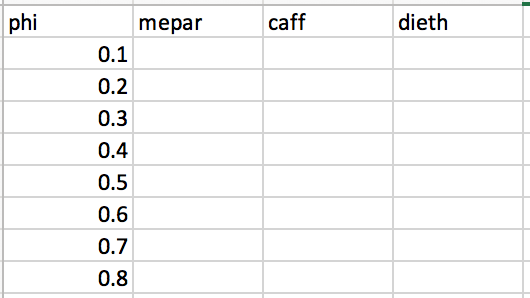

Once you have made this file, move on to the code below:

In [1]:
# we will often import a number of extra packages into python. These are just a the ones we need today:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


# Next, read in the .csv datafile that you just made.
data = np.genfromtxt('HPLCphiData2.csv', dtype=float, delimiter=',', names=None) 

print(data)
# Note the format here; each row is for a different phi value, the first column is the list of phi values, 
# and the other columns are the retention factors for each compound. 

# Now show that you know how to slice out phi, mepar, dieth, and caff from the 2-D data array.  
# Here is an example.  Add the other slices.
phi = data[:,0]
mepar = data[:,1]
caff = data[:,2]
dieth = data[:,3]


# Write some classy print statements to show that your array slicing worked correctly.  An example:

print ("The values for phi are " + str(phi))
print ("The values for mepar are " + str(mepar))
print ("The values for caff are " + str(caff))
print ("The values for dieth are " + str(dieth))


[[1.00000e-01 2.35917e+01 1.20000e-02 4.06680e+00]
 [2.00000e-01 7.81760e+00 3.30000e-03 1.89930e+00]
 [3.00000e-01 2.59050e+00 9.00000e-04 8.87000e-01]
 [4.00000e-01 8.58400e-01 3.00000e-04 4.14200e-01]
 [5.00000e-01 2.84500e-01 1.00000e-04 1.93500e-01]
 [6.00000e-01 9.43000e-02         nan 9.03000e-02]
 [7.00000e-01 3.12000e-02         nan 4.22000e-02]
 [8.00000e-01 1.04000e-02         nan 1.97000e-02]]
The values for phi are [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]
The values for mepar are [2.35917e+01 7.81760e+00 2.59050e+00 8.58400e-01 2.84500e-01 9.43000e-02
 3.12000e-02 1.04000e-02]
The values for caff are [0.012  0.0033 0.0009 0.0003 0.0001    nan    nan    nan]
The values for dieth are [4.0668 1.8993 0.887  0.4142 0.1935 0.0903 0.0422 0.0197]


## Fake zeros or "nan"s?
Notice that you have some zeros or "nan" values in the caffeine array.  These are not valid data points -- they are not actually zero, but were rounded to zero by the output limit of the HPLC simulator program, which is set to four digits after the decimal. Furthermore, these zeros will cause problems in our line fitting later, so we need to remove them from the array.  

Adapt one of the functions in the next code block to clean up the zeros (or nans).  Then write a classy print statement to show yourself that it worked.

In [2]:
# Here is an example function that removes "nan" values from a numpy array called x.
# x = x[np.logical_not(np.isnan(x))]
caff = caff[np.logical_not(np.isnan(caff))]
print (caff)

# Here is an example function that removes zeros from a numpy array called x.
# x = np.trim_zeros(x)


[0.012  0.0033 0.0009 0.0003 0.0001]


Now that you've removed zeros from the "caff" array, you also need to create a special phi array that has only the matching values for each of the retention factors in the caff array.  Use the numpy delet function to make the appropriate phi_caff array in the next code block.

In [3]:
# Here is an example delete function that removes all data points from the array "x" starting with the seventh 
# (counting from zero).  Adapt it to create the "phi_caff" array that you want from "phi". 

# x_shortened = np.delete(x,np.s_[6:])
phi_caff = np.delete(phi,np.s_[5:])

# Now write a print statement to make sure it worked correctly.
print (phi_caff)

[0.1 0.2 0.3 0.4 0.5]


## Plotting a standard curve 
Now it's time to plot our data with phi on the x-axis and the retention factors on the y axis.  Adapt code from previous labs to plot the mepar and dieth datasets on one graph, fit straight lines, and get the equations and R2 values for each line.  When fitting lines using the stats.linregress function, designate the outputs to specific compounds using, for example, "m_mepar" instead of "m".

When finished, copy the graph, equations and R2 values into your ELN.


Text(0, 0.5, 'y axis labels (are there units here too?)')

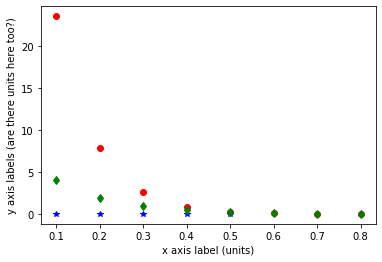

In [4]:
# Paste and adapt code here.


plt.plot(phi, mepar, 'ro')
plt.plot(phi_caff, caff, 'b*')
plt.plot(phi, dieth, 'gd')



# Add labels on the x and y axis, always including units.
plt.xlabel("x axis label (units)")
plt.ylabel("y axis labels (are there units here too?)")



## Linear Fits
Now you can copy and adapt the Python code to calculate slope, intercept, R, p and u_m from each dataset.  However, you will want to differentiate the values calculated in each case by giving them names such as "m_mepar" instead of "m" when you list all the variables to be calculated by each linregress function.

In [5]:
# Paste and adapt code here.

# The linear regression function in the scipy stats module returns 5 values: slope, intercept, 
#   R (the correlation coefficient, which is usually reported after squaring it to get R2) and 
#   then two other uncertainty values p and u_m.  You can name these outputs whatever you want.
# We'll ignore the last two for the moment, since all we really need right now is the equation of the line
m_mepar, b_mepar, R_mepar, p, u_m = stats.linregress(phi, mepar)
m_caff, b_caff, R_caff, p, u_m = stats.linregress(phi_caff, caff)
m_dieth, b_dieth, R_dieth, p, u_m = stats.linregress(phi, dieth)

# Write some code to calculate R_squared:
R2_mepar = R_mepar**2
R2_caff = R_caff**2
R2_dieth = R_dieth**2

# Classy output print statements giving the equation of the line and the R2 values:
print ('the equation of the mepar line is y = ' + str(m_mepar) + 'x + ' + str(b_mepar) + ' and its R2 value is '+ str(R2_mepar))
print ('the equation of the caff line is y = ' + str(m_caff) + 'x + ' + str(b_caff) + ' and its R2 value is '+ str(R2_caff))
print ('the equation of the dieth line is y = ' + str(m_dieth) + 'x + ' + str(b_dieth) + ' and its R2 value is '+ str(R2_dieth))




the equation of the mepar line is y = -25.245666666666665x + 15.770375 and its R2 value is 0.5699666014542356
the equation of the caff line is y = -0.026799999999999994x + 0.011359999999999999 and its R2 value is 0.7133322739551881
the equation of the dieth line is y = -4.788809523809523x + 3.1065892857142856 and its R2 value is 0.6925528608307093


## Adding the 'best fit line' to your graph

Once again, paste and adapt code to plot the data along with the best fit lines.  See if you can get it all on one plot, with the colors of the fit lines matching that of the data.

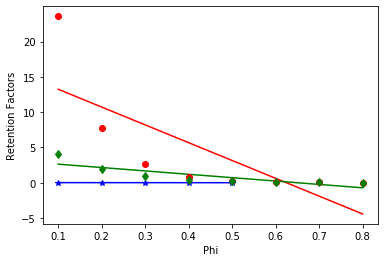

In [6]:
# Use our predicted model
predict_ymepar = (phi*m_mepar)+b_mepar
predict_ycaff = (phi_caff*m_caff)+b_caff
predict_ydieth = (phi*m_dieth)+b_dieth

# Plot the predicted data (note if we don't ask for a specific marker style, we'll just get a line)
plt.plot(phi,predict_ymepar, 'r-')
plt.plot(phi_caff,predict_ycaff, 'b-')
plt.plot(phi,predict_ydieth, 'g-')

#add the real data to the plot, just like we did before:
plt.plot(phi, mepar, 'ro')
plt.plot(phi_caff, caff, 'b*')
plt.plot(phi, dieth, 'gd')

plt.xlabel("Phi")
plt.ylabel("Retention Factors")

plt.savefig("k'_vs_phi_Linear_fig.png")

Upload your graph into the ELN, adding a caption that explains the colors and symbols, and some narrative that describes what the graph is all about.


## Quadratic equation fitting

OK, you're done with the linear fitting -- and hopefully you are dissatisfied with how your data is fit by linear functions.  Let's get Python to try quadratic functions instead!  The polynomial regression 'polyfit' function in the numpy module returns the fitting coefficients, from highest order to the lowest, that result in minimized sum-of-squares error of the y-residuals.  In other words, for a 2nd order polynomial fit, the first number output is the coefficient of the $ x^{2} $ term, the second number is the coefficient of the <i>x</i> term, and the last number in the output is the intercept.  

Adapt the code below:

In [7]:
# Here is sample code to calculate a 3rd order polynomial fit on x and y data, outputting the four coefficients 
# in order.  Adapt this code to calculate 2nd order polynomial fits for your data, being careful to differentiate 
# the output variables in each case.

# z3, z2, z1, z0 = np.polyfit(x, y, 3)

z2_mepar,z1_mepar,z0_mepar = np.polyfit(phi, mepar, 2)
z2_caff,z1_caff,z0_caff = np.polyfit(phi_caff, caff, 2)
z2_dieth,z1_dieth,z0_dieth = np.polyfit(phi, dieth, 2)

print(z2_mepar,z1_mepar,z0_mepar)
print(z2_caff,z1_caff,z0_caff)
print(z2_dieth,z1_dieth,z0_dieth)


94.8182142857145 -110.58205952380965 29.99310714285718
0.13428571428571448 -0.1073714285714287 0.02076000000000003
14.628928571428622 -17.954845238095274 5.300928571428582


## Graphing a polynomial fit
Now that you have your polynomial equations, it's time to add them to the graph and see how close they fit the data.  Reuse the code from the linear fit graphing code block, but update the prediction lines (and prediction variable names).


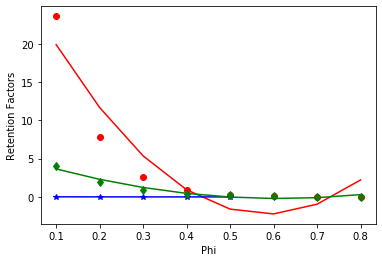

In [8]:
# Use our predicted model
predict2_ymepar = ((phi**2)*z2_mepar)+(phi*z1_mepar)+z0_mepar
predict2_ycaff = ((phi_caff)**2*z2_caff)+(phi_caff*z1_caff)+z0_caff
predict2_ydieth = ((phi)**2*z2_dieth)+(phi*z1_dieth)+z0_dieth

# Plot the predicted data (note if we don't ask for a specific marker style, we'll just get a line)
plt.plot(phi,predict2_ymepar, 'r-')
plt.plot(phi_caff,predict2_ycaff, 'b-')
plt.plot(phi,predict2_ydieth, 'g-')

#add the real data to the plot, just like we did before:
plt.plot(phi, mepar, 'ro')
plt.plot(phi_caff, caff, 'b*')
plt.plot(phi, dieth, 'gd')

plt.xlabel("Phi")
plt.ylabel("Retention Factors")


plt.savefig("k'_vs_phi_Quadratic_fig.png")

<i>Record observations on the quality of the quadratic fit, relative to the linear fit, in your ELN.</i>  Note that retention factors cannot be negative for a model to be functional.  <i>Which of your models (fits) so far are predicting negative retention factors at some values of phi?</i>



## Exponential fitting

While it is possible to take the same datasets and try fitting exponential functions, it is easier to transform the data by taking the natural logarithm of all the y values.  If data is exponential, graphing lny vs x will linearize the data, and in this case we can use are knowledge of error analysis again.  So, let's try this next!

In the code block below, use the natural logarithm function "np.log" on the numpy arrays "mepar", "caff", and "dieth".


In [9]:
# Enter your code here to take natural logarithms of all the y data.

ln_mepar = np.log(mepar)
ln_caff = np.log(caff)
ln_dieth = np.log(dieth)

# Now paste and adapt your code to create linear least squares fits to the transformed data.

m_ln_mepar, b_ln_mepar, R_ln_mepar, p, u_m = stats.linregress(phi, ln_mepar)
m_ln_caff, b_ln_caff, R_ln_caff, p, u_m = stats.linregress(phi_caff, ln_caff)
m_ln_dieth, b_ln_dieth, R_ln_dieth, p, u_m = stats.linregress(phi, ln_dieth)

# Write some code to calculate R_squared:
R2_ln_mepar = R_ln_mepar**2
R2_ln_caff = R_ln_caff**2
R2_ln_dieth = R_ln_dieth**2

# Classy output print statements giving the equation of the line and the R2 values:
print ('the equation of the ln_mepar line is y = ' + str(m_ln_mepar) + 'x + ' + str(b_ln_mepar) + ' and its R2 value is '+ str(R2_ln_mepar))
print ('the equation of the ln_caff line is y = ' + str(m_ln_caff) + 'x + ' + str(b_ln_caff) + ' and its R2 value is '+ str(R2_ln_caff))
print ('the equation of the ln_dieth line is y = ' + str(m_ln_dieth) + 'x + ' + str(b_ln_dieth) + ' and its R2 value is '+ str(R2_ln_dieth))



the equation of the ln_mepar line is y = -11.041690101842862x + 4.264367496477476 and its R2 value is 0.9999996678357108
the equation of the ln_caff line is y = -11.972878758362457x + -3.3025095104168734 and its R2 value is 0.998128140417922
the equation of the ln_dieth line is y = -7.614196181741921x + 2.1643205234978455 and its R2 value is 0.999999985159802


Finally, graph the transformed data and the linear equations fit to it.  

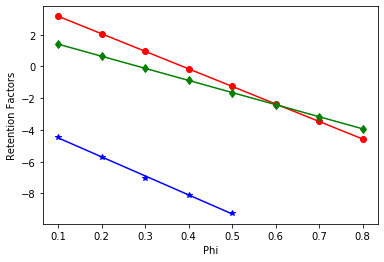

In [10]:
# Use our predicted model
predict_ylnmepar = (phi*m_ln_mepar)+b_ln_mepar
predict_ylncaff = (phi_caff*m_ln_caff)+b_ln_caff
predict_ylndieth = (phi*m_ln_dieth)+b_ln_dieth

# Plot the predicted data (note if we don't ask for a specific marker style, we'll just get a line)
plt.plot(phi,predict_ylnmepar, 'r-')
plt.plot(phi_caff,predict_ylncaff, 'b-')
plt.plot(phi,predict_ylndieth, 'g-')

#add the real data to the plot, just like we did before:
plt.plot(phi, ln_mepar, 'ro')
plt.plot(phi_caff, ln_caff, 'b*')
plt.plot(phi, ln_dieth, 'gd')

plt.xlabel("Phi")
plt.ylabel("Retention Factors")

plt.savefig("k'_vs_phi_Exponential_fig.png")

<i>Record your observations once again on the quality of the exponential fit relative to the others, and upload the summary graph to the ELN.  Which of these models can you use to predict retention factors at other phi values?  In other words what is the relationship between k' and phi?</i>  

For your best model (linear, quadratic, or exponential), record in your ELN the fit parameters (slope and intercept or Z2, Z1, Z0) calculated by Python for each compound.

# Part 2:  Other compounds

Now that you know the model, you can easily calculate the fit coefficients of the retention index function for other compounds based on only two data points each.  Since the amount of data is very small, we'll just enter in the twelve numbers by hand.  But don't forget to use the correct model!  Use the code block below:

In [11]:
# Calculate slope and intercept from two datapoints.
# Fill in the array values below.  Don't forget to use the correct model!  

phi_two = [0.2, 0.8]
nbenz = [1.7602, 0.1326]
benzalc = [2.3844,0.2156]
phenol = [3.5369, 0.2359]
acetanil = [3.7919,0.0934]
mepar = [7.8176, 0.0104]

ln_nbenz = np.log(nbenz)
ln_benzalc = np.log(benzalc)
ln_phenol = np.log(phenol)
ln_acetanil = np.log(acetanil)
ln_mepar = np.log(mepar)

# Find the linear regression for each compound

m_ln_nbenz, b_ln_nbenz, R, p, u_m = stats.linregress(phi_two, ln_nbenz)
m_ln_benzalc, b_ln_benzalc, R, p, u_m = stats.linregress(phi_two, ln_benzalc)
m_ln_phenol, b_ln_phenol, R, p, u_m = stats.linregress(phi_two, ln_phenol)
m_ln_acetanil, b_ln_acetanil, R, p, u_m = stats.linregress(phi_two, ln_acetanil)
m_ln_mepar, b_ln_mepar, R, p, u_m = stats.linregress(phi_two, ln_mepar)

# Classy output print statements giving the equation of the line (but there are no R2 values):
print ('the equation of the mepar line is y = ' + str(m_ln_mepar) + 'x + ' + str(b_ln_mepar))
print ('the equation of the nbenz line is y = ' + str(m_ln_nbenz) + 'x + ' + str(b_ln_nbenz))
print ('the equation of the benzalc line is y = ' + str(m_ln_benzalc) + 'x + ' + str(b_ln_benzalc))
print ('the equation of the phenol line is y = ' + str(m_ln_phenol) + 'x + ' + str(b_ln_phenol))
print ('the equation of the acetanil line is y = ' + str(m_ln_acetanil) + 'x + ' + str(b_ln_acetanil))


the equation of the mepar line is y = -11.037211791526824x + 4.263819960386649
the equation of the nbenz line is y = -4.309742733646582x + 1.4273759856868906
the equation of the benzalc line is y = -4.005463267184882x + 1.6700401738006108
the equation of the phenol line is y = -4.512663216408031x + 2.165783280557917
the equation of the acetanil line is y = -6.172885244140616x + 2.5674442615651527


As usual, to check our work let's graph the equations along with the data to make sure they match.  Use the colors "r", "y", "g", "b", and "m" for the five compounds.

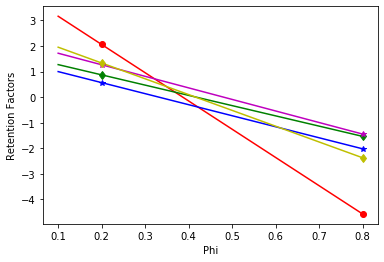

In [12]:
# Use our predicted model
predict_ymepar = (phi*m_ln_mepar)+b_ln_mepar
predict_ynbenz = (phi*m_ln_nbenz)+b_ln_nbenz
predict_ybenzalc = (phi*m_ln_benzalc)+b_ln_benzalc
predict_yphenol = (phi*m_ln_phenol)+b_ln_phenol
predict_yacetanil = (phi*m_ln_acetanil)+b_ln_acetanil


# Plot the predicted data (note if we don't ask for a specific marker style, we'll just get a line)
plt.plot(phi,predict_ymepar, 'r-')
plt.plot(phi,predict_ynbenz, 'b-')
plt.plot(phi,predict_ybenzalc, 'g-')
plt.plot(phi,predict_yphenol, 'm-')
plt.plot(phi,predict_yacetanil, 'y-')

#add the real data to the plot, just like we did before:
plt.plot(phi_two, ln_mepar, 'ro')
plt.plot(phi_two, ln_nbenz, 'b*')
plt.plot(phi_two, ln_benzalc, 'gd')
plt.plot(phi_two, ln_phenol, 'm*')
plt.plot(phi_two, ln_acetanil, 'yd')

plt.xlabel("Phi")
plt.ylabel("Retention Factors")

plt.savefig("k'_vs_phi_2pt_fig.png")

Upload this plot to the ELN, along with the fit coefficients (m, b, or z2,z1,z0).  You now have the information you need to predict retention time of seven compounds at any mixing ratio of water and acetonitrile!  

## Building the model
At this point, we want to construct a large data array that contains all of the modeled retention factors for all seven compounds at all of the mobile phase mixtures (phi).  We will use a while loop to do this!

Remember that a while loop uses a counter to cycle through repetitive calculations!

In [13]:
# According to the lab handout, we want to calculate and store values for lnk for all phi values from 0.10 to 0.80 
# with a step size of 0.01.  Let's use row as our counter, make a 2-D array of all the output lnk' values,
# and make a matching 1-D array of all the phi values.  In the code below,
# make sure the slope and intercept variable names match the ones you've calculated in earlier code blocks, then run
# this code.  You should see a row-by-row printout of the array for phi values between 0.1 and 0.2.  

modlnk = []
philist = []
phi = 0.10
row = 0
    
# Now we must calculate lnk for all seven compounds and store them in the array.  

while phi < 0.81:
    modlnk_acetanil = phi*(m_ln_acetanil)+b_ln_acetanil
    modlnk_benzalc = phi*(m_ln_benzalc)+b_ln_benzalc
    modlnk_caff = phi*(m_ln_caff)+b_ln_caff
    modlnk_dieth = phi*(m_ln_dieth)+b_ln_dieth
    modlnk_mepar = phi*(m_ln_mepar)+b_ln_mepar
    modlnk_nbenz = phi*(m_ln_nbenz)+b_ln_nbenz
    modlnk_phenol = phi*(m_ln_phenol)+b_ln_phenol
    newrow = [modlnk_acetanil, modlnk_benzalc, modlnk_caff, modlnk_dieth, modlnk_mepar, modlnk_nbenz, modlnk_phenol]
    modlnk.append (newrow)
    philist.append (phi)
    phi = phi + 0.01
    row = row + 1

print ('modlnk:')
print (modlnk) 
print ('philist:')
print (philist)

# If the output looks good, change the while loop limit to do all the calculations between phi = 0.1 and 0.8.

modlnk:
[[1.950155737151091, 1.2694938470821224, -4.499797386253119, 1.4029009053236534, 3.160098781233967, 0.9964017123222324, 1.714516958917114], [1.888426884709685, 1.2294392144102737, -4.619526173836744, 1.3267589435062344, 3.0497266633186983, 0.9533042849857667, 1.6693903267530337], [1.8266980322682786, 1.189384581738425, -4.739254961420368, 1.250616981688815, 2.93935454540343, 0.9102068576493009, 1.6242636945889535], [1.7649691798268727, 1.149329949066576, -4.858983749003993, 1.1744750198713958, 2.828982427488162, 0.8671094303128349, 1.579137062424873], [1.7032403273854664, 1.109275316394727, -4.978712536587618, 1.0983330580539765, 2.7186103095728935, 0.8240120029763691, 1.5340104302607926], [1.64151147494406, 1.0692206837228784, -5.098441324171242, 1.0221910962365572, 2.6082381916576254, 0.7809145756399033, 1.4888837980967122], [1.5797826225026539, 1.0291660510510297, -5.218170111754867, 0.946049134419138, 2.4978660737423573, 0.7378171483034374, 1.443757165932632], [1.5180537700

OK, that's more numbers than we want to deal with by hand, right?  

## Sorting each row
Our next task is that we need to find the difference between the two closest-together numbers in every row.  This is a complex task, but we can break it down into several small steps to automate it.  Here is the strategy we will use:  first, we will make a new 2-D array with the ln<i>k</i> values within each row sorted from lowest to highest.  Second, we'll calculate the difference between adjacent numbers in the sorted array.  Third, we'll sort the differences array, so that the smallest difference will be listed first in each row.  At that point it will be easy to slice out the first column of the array, which will contain the difference between the two closest-together numbers in each row in our original array.  Problem solved!

In order to execute the first step, we will use a ready-made <b>subroutine</b>.  In the code below, first comes the <b>def</b>inition of a subroutine called "sortRowWise" which does the sorting in a <b>for loop</b>, and then prints out the resulting sorted 2-D array in a second pair of <b>nested for loops</b>.  The subroutine ends at the line "return 0" (as does the indentation).  Below the subroutine is the <b>driver code</b> that sets up an array of test data and then passes it to the subroutine in a <b>call statement</b> with the syntax <i>SubroutineName(variable1,variable2 ...)</i>.  The variables sent to the subroutine can be numbers or arrays of any dimension.

### How subroutines work
When Python runs this code block, it will ignore any subroutines until they are called.  So Python will skip down to the line beginning with "m = " and run the code starting there.  The next line calls the "sortRowWise" subroutine and sends it the array "m".  Python then finds where this subroutine is defined and runs it, line by line, until it hits "return 0".  At this point, Python jumps back to the call statement with the array "m" that has been modified by the subroutine, and continues through the program from there.  

### How are for loops different from while loops?
This is our first use of <b>for</b> loops in this course.  A <b>for</b> loop is similar to a <b>while</b> loop, but only runs for a set number of iterations, defined in the <b>for</b> statement.  Because of this, you don't need a line of code that sets a counter to zero, and you don't need a line of code that advances the counter each time you go through the loop ("count = count + 1") -- Python is doing the counting for you, always starting at zero.  A <b>while</b> loop can run a variable number of times until the <b>while</b> statement is satisfied.  <b>While</b> loops are more likely to get stuck in infinite loops, requiring you to stop the kernel!  However, they are necessary in situations where, say, a calculation needs to converge on an answer, and you can't predict how long that will take.  

Check out the following code, then run it.  Dr. D has added a lot of comments to help you understand how it works.  Note how the print statement in the subroutine gives you a different look than the print statement in the last line of the program:

In [14]:
# Here is a Python3 subroutine called "sortRowWise" to sort values in each row from smallest to leargest, 
# in a 2D matrix.  Dr. D took this code from the computer science portal GeeksforGeeks.org. 

# Defines a subroutine called "sortRowWise" which you can run on the array of your choice.  In the subroutine,
# it will use the name "m" for the array, but you can send it an array with another name in the call statement.  
def sortRowWise(m): 
      
    # One by one sort individual rows. 
    for i in range(len(m)):   # len(m) is the number of lines in the matrix.
        m[i].sort()           # Uses a sort function!
          
    # printing the sorted matrix 
    for i in range(len(m)): 
        for j in range(len(m[i])):   # ln(m[i]) is the number of numbers (columns) represented in row m[i]
            print(m[i][j], end=" ")  # i is the row and j is the column
        print() 
          
    return 0  #Tells Python the function is over, go back to the call statement line.
  

# Driver code to test out how it works.
# Sample array called "m"
m = [[9, 8, 7, 1 ],[7, 3, 0, 2],[9, 5, 3, 2 ],[ 6, 3, 1, 2]] 
  
# This line calls the function and sends it the array "m".    
sortRowWise(m) 
# This code is contributed by shubhamsingh10  
print(m)

1 7 8 9 
0 2 3 7 
2 3 5 9 
1 2 3 6 
[[1, 7, 8, 9], [0, 2, 3, 7], [2, 3, 5, 9], [1, 2, 3, 6]]


OMG, it worked on the first try!  Thanks, Shubhamsingh10, you're the best!  

Now it's your turn.  Write a call statement the tells the sortRowWise function to operate on your massive matrix of lnk' values.  But before you do that, first copy the matrix into a fresh matrix with a new name -- otherwise the subroutine will overwrite your original matrix.

In [15]:
def sortRowWise(m): 
      
    # One by one sort individual rows. 
    for i in range(len(m)):  
        m[i].sort()  
          
    # printing the sorted matrix 
    for i in range(len(m)): 
        for j in range(len(m[i])): 
            print(m[i][j], end=" ") 
        print() 
          
    return 0
  

# Add your own three lines of driver code.  
# Line 1:  rename your modlnk array "modlnksort" so it won't get overwritten by the subroutine


# Line 2:  call the function and send it the "modlnksort" array


# Line 3:  Re-print the results, to make sure the subroutine has passed the correct data back.  
# Once you run the code, check the first few numbers of the array in each of the two printouts -- they should match!

modlnksort = modlnk
sortRowWise(modlnksort)
print(modlnksort)

-4.499797386253119 0.9964017123222324 1.2694938470821224 1.4029009053236534 1.714516958917114 1.950155737151091 3.160098781233967 
-4.619526173836744 0.9533042849857667 1.2294392144102737 1.3267589435062344 1.6693903267530337 1.888426884709685 3.0497266633186983 
-4.739254961420368 0.9102068576493009 1.189384581738425 1.250616981688815 1.6242636945889535 1.8266980322682786 2.93935454540343 
-4.858983749003993 0.8671094303128349 1.149329949066576 1.1744750198713958 1.579137062424873 1.7649691798268727 2.828982427488162 
-4.978712536587618 0.8240120029763691 1.0983330580539765 1.109275316394727 1.5340104302607926 1.7032403273854664 2.7186103095728935 
-5.098441324171242 0.7809145756399033 1.0221910962365572 1.0692206837228784 1.4888837980967122 1.64151147494406 2.6082381916576254 
-5.218170111754867 0.7378171483034374 0.946049134419138 1.0291660510510297 1.443757165932632 1.5797826225026539 2.4978660737423573 
-5.337898899338492 0.6947197209669715 0.8699071726017187 0.9891114183791807 1.

Look over your data.  Each row should now be ordered from lowest (most negative) to highest (most positive).  At this point, you should feel really happy that you're not trying to do this on Excel.

## Calculating the difference between adjacent numbers in each row
Now that you feel really happy that the numbers in each row are in order, we can use Python to calculate the differences between each number and its row-neighbors, and store these results in a new array.  Here goes, with a subroutine written by Dr. D!  Take a look at how it works, stepping through each row (i), and then nested within that <b>for</b> loop is another <b>for</b> loop going down each row through (j) columns to calculate the differences.

Notice that this subroutine works with two arrays, an input array (first) and an output array (second).  This is another way to solve the problem of overwriting data, but in this case it is necessary because the input and output arrays have different dimensions.

Once you've looked over the subroutine code, write your own driver code again.

In [16]:
# Subroutine to calculate the difference between all adjacent numbers in each row of a 2-D array

def RowDiffs(m, diff):    #This subroutine must be called with an input array "m" and an empty output array "diff"

    # Take the differences of all adjacent numbers in each individual row. 
    for i in range(len(m)):          # For loop to step through rows
        diffrow = []                 # Set up empty array to hold the differences between numbers in this row
        for j in range(len(m[i])-1): # For loop to go down the row.  If a row holds 7 numbers, there will be 6 differences
            difftemp = (m[i][j+1] - m[i][j])   # Calculate the difference between 2 adjacent numbers
            # print(difftemp)
            diffrow.append(difftemp) # Append the difference into the row array
        # print(diffrow)
        diff.append(diffrow)         # Append the difference row to a 2-D array
    
    # printing the sorted matrix.     
    for i in range(len(diff)): 
        for j in range(len(diff[i])): 
            print(diff[i][j], end=" ") 
        print() 
    return 0

# This code is contributed by ddehaan.  Learning so much about coding!  :-)  

# Add your own three lines of driver code.  
# Line 1:  declare an empty array called "diff"

# Line 2:  call the RowDiffs subroutine, passing two arrays (input array "modlnksort" first, empty output array 
# "diff" second) 

# Line 3:  print out the output array, so that you can check the data transfer from the subroutine went correctly.
diff=[]
RowDiffs(modlnksort, diff)
print('diff = ')
print(diff)

5.496199098575351 0.27309213475989 0.13340705824153098 0.3116160535934607 0.23563877823397683 1.209943044082876 
5.57283045882251 0.276134929424507 0.09731972909596065 0.3426313832467993 0.21903655795665133 1.1612997786090133 
5.649461819069669 0.2791777240891241 0.06123239995039009 0.3736467129001384 0.20243433767932517 1.1126565131351516 
5.726093179316829 0.2822205187537411 0.025145070804819758 0.40466204255347726 0.18583211740199967 1.0640132476612894 
5.802724539563987 0.2743210550776074 0.010942258340750577 0.42473511386606555 0.16922989712467373 1.0153699821874271 
5.879355899811145 0.24127652059665394 0.047029587486321134 0.41966311437383386 0.1526276768473478 0.9667267167135654 
5.955987260058305 0.2082319861157006 0.08311691663189169 0.4145911148816024 0.13602545657002185 0.9180834512397034 
6.032618620305463 0.17518745163474714 0.11920424577746203 0.40951911538937114 0.11942323629269591 0.8694401857658409 
6.1092499805526215 0.14214291715379368 0.15529157492303236 0.40444711

The "diff" array now contains all the differences between the adjacent peak retention factors at a given acetonitrile / water mixture.  We are interested in the two closest peaks under each conditions, so we need to extract the smallest numbers in each row.  Use the <b>sortRowWise</b> subroutine to put the numbers in order, in a new array called "diffsort".

In [17]:
def sortRowWise(m): 
      
    # One by one sort individual rows. 
    for i in range(len(m)):  
        m[i].sort()  
          
    # printing the sorted matrix 
    for i in range(len(m)): 
        for j in range(len(m[i])): 
            print(m[i][j], end=" ") 
        print() 
          
    return 0
  

# Add your own three lines of driver code.  
# Line 1:  rename your modlnk array "modlnksort" so it won't get overwritten by the subroutine


# Line 2:  call the function and send it the "modlnksort" array


# Line 3:  Re-print the results, to make sure the subroutine has passed the correct data back.  
# Once you run the code, check the first few numbers of the array in each of the two printouts -- they should match!

diffsort = diff
sortRowWise(diffsort)
print(diffsort)

0.13340705824153098 0.23563877823397683 0.27309213475989 0.3116160535934607 1.209943044082876 5.496199098575351 
0.09731972909596065 0.21903655795665133 0.276134929424507 0.3426313832467993 1.1612997786090133 5.57283045882251 
0.06123239995039009 0.20243433767932517 0.2791777240891241 0.3736467129001384 1.1126565131351516 5.649461819069669 
0.025145070804819758 0.18583211740199967 0.2822205187537411 0.40466204255347726 1.0640132476612894 5.726093179316829 
0.010942258340750577 0.16922989712467373 0.2743210550776074 0.42473511386606555 1.0153699821874271 5.802724539563987 
0.047029587486321134 0.1526276768473478 0.24127652059665394 0.41966311437383386 0.9667267167135654 5.879355899811145 
0.08311691663189169 0.13602545657002185 0.2082319861157006 0.4145911148816024 0.9180834512397034 5.955987260058305 
0.11920424577746203 0.11942323629269591 0.17518745163474714 0.40951911538937114 0.8694401857658409 6.032618620305463 
0.10282101601536997 0.14214291715379368 0.15529157492303236 0.4044471

Did you print out "diffsort" to make sure your subroutine call worked correctly?  Good!  

Our last step is to slice out the first column of data from the array, because the first column now has the differences in ln(retentionIndex) between the two closest peaks at each condition.  You now know how to do this -- but you can also borrow and adapt code from the first code block in this Jupyter notebook to help you!  Note that you may have to convert your array to a Numpy array ("newarray = np.array(oldarray)") for slicing to work properly.

As always, check that your code is working properly by examining the output of a print statement.

In [18]:
npdiffsort = np.array(diffsort)
mindiff = npdiffsort[:,0]


# Write some classy print statements to show that your array slicing worked correctly.  An example:

print ("The closest peak delta lnk values at each phi are " + str(mindiff))


The closest peak delta lnk values at each phi are [0.13340706 0.09731973 0.0612324  0.02514507 0.01094226 0.04702959
 0.08311692 0.11920425 0.10282102 0.0862188  0.06961658 0.04300931
 0.00996478 0.01980991 0.00320769 0.01339453 0.02999675 0.04659897
 0.06320119 0.07980341 0.09640563 0.07542662 0.01018114 0.05506435
 0.04250467 0.00613859 0.05478186 0.00796717 0.07378374 0.05210952
 0.0304353  0.00876108 0.01090697 0.03458736 0.05626158 0.0779358
 0.09961002 0.12128424 0.14295846 0.16463268 0.1863069  0.1898656
 0.17123417 0.15260275 0.13397132 0.1153399  0.09670847 0.07807704
 0.05944562 0.04081419 0.02218277 0.00355134 0.01508008 0.03371151
 0.05234293 0.07097436 0.08960578 0.10823721 0.12686863 0.14550006
 0.14070314 0.13563114 0.13055914 0.12548714 0.12041514 0.11534314
 0.11027115 0.10519915 0.10012715 0.09505515 0.08998315]


At this point, you have two 1-D arrays:  "philist" from several code blocks back, which contains the list of all the phi values from 0.1 to 0.8 in steps of 0.01; and the array that you just sliced out in the previous code block, which should be the corresponding closest-peak "delta ln<i>k</i>" values.  These arrays should be the same length!  

Your last Python task is to graph these two arrays against each other to make a window plot -- the phi values should be on the x-axis.  Use the code block below to graph the data as a red line, and be sure to include axis labels as usual.  

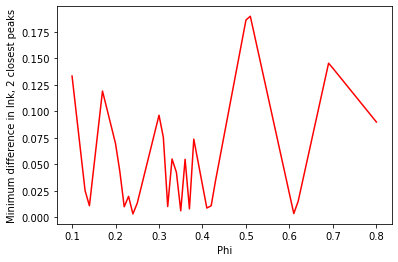

In [19]:
# Make window plot
plt.plot(philist, mindiff, 'r-')

plt.xlabel("Phi")
plt.ylabel("Minimum difference in lnk, 2 closest peaks")

plt.savefig("WindowPlot_fig.png")

## Extra credit option
In order to interpret your graph without having to eyeball Phi values off of it, it would be convenient to make a long table that shows the paired "philist" and minimum difference values so that you could exactly locate the peaks.  Remember how the print statements in the subroutine for loop came out so neatly?  For extra credit, write (or adapt) a for loop that will print out the paired values, one pair per line.  Include labels at the top of the output.

In [20]:
print('Phi value       Minimum delta lnk')
# printing the sorted matrix 
for i in range(len(philist)): 
    print(philist[i], mindiff[i]) 

          

Phi value       Minimum delta lnk
0.1 0.13340705824153098
0.11 0.09731972909596065
0.12 0.06123239995039009
0.13 0.025145070804819758
0.14 0.010942258340750577
0.15000000000000002 0.047029587486321134
0.16000000000000003 0.08311691663189169
0.17000000000000004 0.11920424577746203
0.18000000000000005 0.10282101601536997
0.19000000000000006 0.08621879573804425
0.20000000000000007 0.06961657546071853
0.21000000000000008 0.04300931371093342
0.22000000000000008 0.009964779229979959
0.2300000000000001 0.019809914628740932
0.2400000000000001 0.0032076943514149914
0.2500000000000001 0.01339452592591095
0.2600000000000001 0.02999674620323667
0.27000000000000013 0.04659896648056261
0.28000000000000014 0.06320118675788855
0.29000000000000015 0.07980340703521449
0.30000000000000016 0.09640562731254021
0.31000000000000016 0.07542662154190483
0.3200000000000002 0.01018113579071711
0.3300000000000002 0.055064349960470604
0.3400000000000002 0.04250467271018499
0.3500000000000002 0.006138592763677231
0

Wow, you made it!


## Submission Instructions
In your ELN, upload each of the graphs you made in this notebook into the Expt 7 R&A section, and explain what each graph is telling you.   
Save this notebook with your name in the title and upload it, too!  There are a few questions to answer in the ELN, and you will use the HPLC simulator one more time to test the predictions of the chromatography model you just made in this Jupyter notebook.